# 1. Methodology

Probability is the branch of mathematics concerning numerical descriptions of how likely an event is to occur, or how likely it is that a proposition is true. The probability of an event is a number between 0 and 1. All phenomena in nature are random events, so if we can know the possibility of this event, we can predict the likelihood of it happening in the future or we can make decisions depending on it.

## 1.1. Counting
There are a number of ways choosing $k=2$ elements from a set $\{A,B,C,D\}$ having $n=4$ elements: [permutation](https://en.wikipedia.org/wiki/Permutation) are for order subsets and [combination](https://en.wikipedia.org/wiki/Combination) for unordered subsets.

|**Type**|Permutation|Permutation|Combination|Combination|
|:-|:-:|:-:|:-:|:-:|
|**Arrangement**|&check;|&check;|||
|**Repetition**|&check;||&check;||
|**Formula**|$$n^k$$|$$\frac{n!}{(n-k)!}$$|$$\frac{(n+k-1)!}{(n-1)! k!}$$|$$\frac{n!}{k!(n-k)!}$$|
|**Enumeration**|AA|AB|AA|AB|
||AB|AC|AB|AC|
||AC|AD|AC|AD|
||AD|BA|AD|BC|
||BA|BC|BB|BD|
||BB|BD|BC|CD|
||BC|CA|BD||
||BD|CB|CC||
||CA|CD|CD||
||CB|DA|DD||
||CC|DB|||
||CD|DC|||
||DA||||
||DB||||
||DC||||
||DD||||
|**Count**|**16**|**12**|**10**|**6**|

### Implementation
This section uses Itertools for enumerating and Scipy for counting.

In [1]:
import numpy as np
import pandas as pd
from scipy.special import perm, comb
import itertools as it

In [2]:
mySet = range(1,4)
n = len(mySet)
k = 2

In [3]:
count = n**k
print(f'Permutations with repetition: {count}')
list(it.product(mySet, repeat=k))

Permutations with repetition: 9


[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

In [4]:
count = int(perm(n, k))
print(f'Permutations without repetition: {count}')
list(it.permutations(mySet, k))

Permutations without repetition: 6


[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]

In [5]:
count = int(comb(n, k, repetition=True))
print(f'Combinations with repetition: {count}')
list(it.combinations_with_replacement(mySet, k))

Combinations with repetition: 6


[(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]

In [6]:
count = int(comb(n, k))
print(f'Combinations with repetition: {count}')
list(it.combinations(mySet, k))

Combinations with repetition: 3


[(1, 2), (1, 3), (2, 3)]

## 1.2. Basic concepts

### Experiment and event
- [Experiment](<https://en.wikipedia.org/wiki/Experiment_(probability_theory)>) (or trial) is any procedure that can be infinitely repeated and has a well-defined set of possible outcomes, known as the sample space. An experiment is said to be random if it has more than one possible outcome.
- The result of the experiment is called [event](<https://en.wikipedia.org/wiki/Event_(probability_theory)>). There are three types of event in real life: random, certain and impossible events.
- The [probability](https://en.wikipedia.org/wiki/Probability) of an event shows how likely that event is to occur. The formula for the probability of an event $A$ is the fraction between the number of favorable outcomes over the total of outcomes.

In [7]:
import numpy as np
import pandas as pd
from scipy.special import perm, comb

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
A box has 10 products, in which there are 6 standard products and 4 substandard ones. Take random 3 products from the box. Find the probability that: (1) all 3 are standard products and (2) there are 2 standard products.

In [8]:
support = comb(6,3)
total = comb(10,3)

prob = support / total
print(f'{prob:.2%}')

16.67%


In [9]:
support = comb(6,2) * comb(4,1)
total = comb(10,3)

prob = support / total
print(f'{prob:.2%}')

50.00%


### Addition rule
Addition rule is used to describe the probability of either event $A$ *or* event $B$ happening, denoted $P(A\text{ or }B)$ or $P(A\cup B)$:

$$P(A\cup B)=P(A)+P(B)-P(A\cap B)$$

Here, the relationship between $A$ and $B$ can be described using [exclusivity](https://en.wikipedia.org/wiki/Mutual_exclusivity). The two events are mutually exclusive if they do not occur in the same trial. If $A$ and $B$ are mutually exclusive, then $P(A\cap B)=0$, we can ignore this term in the above equation.

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
A day of the week is chosen at random. What is the probability of choosing a Monday or Tuesday?

In [10]:
pMonday = 1/7
pTuesday = 1/7

prob = pMonday + pTuesday
print(f'{prob:.2%}')

28.57%


<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
In a pet store, there are 6 puppies, 9 kittens, 4 gerbils and 7 parakeets. If a pet is chosen at random, what is the probability of choosing a puppy or a parakeet?

In [11]:
total = 6 + 9 + 4 +7
pPuppy = 6/total
pParakeet = 7/total

prob = pPuppy + pParakeet
print(f'{prob:.2%}')

50.00%


<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
The box has 10 bottles, 2 of which are broken. Find the probability of getting random 6 bottles that includes no more than 1 broken bottles.

In [12]:
# event A0: in 6 bottles there is no broken bottle
# event A1: in 6 bottles there is 1 broken bottle
# event A: in 6 bottles there is no more than 1 broken bottle

pA0 = comb(8,6) / comb(10,6)
pA1 = comb(2,1) * comb(8,5) / comb(10,6)

prob = pA0 + pA1
print(f'{prob:.2%}')

66.67%


### Multiplication rule
Multiplication rule describes the probability of both events $A$ and $B$ happening, denoted $P(A\text{ and }B)$ or $P(A\cap B)$. The formula when $A$ and $B$ are dependent is:

$$P(A\cap B) = P(A)\cdot P(B|A) = P(B)\cdot P(A|B)$$

Two events are independent if knowing one event occurred doesn't change the probability of the other. When $A$ and $B$ are independent, $P(A|B)=P(A)$ and $P(B|A)=P(B)$. The formula is this case is simply:

$$P(A\cap B) = P(A)\cdot P(B)$$

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
Two planes attack a target, each has the probability of hitting of 0.7 and 0.8. Find the probability of the target being hit if each plane attacks once.

In [13]:
# event A1: plane 1 hits the target
# event A2: plane 2 hits the target

pA1 = 0.7
pA2 = 0.8

prob = pA1 + pA2 - pA1*pA2
print(f'{prob:.2%}')

94.00%


<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
The box has 7 standard products and 3 substandard products. Take out randomly 2 products in turns. Find the probability of 2 products being standard.

In [14]:
# event A1: the first product is standard
# event A2: the second product is standard
# event A: all two products are standard

pA1 = 7/10
pA2 = 6/9

prob = pA1 * pA2
print(f'{prob:.2%}')

46.67%


<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
An analyst has estimated the probability that an investment manager will exceed his benchmark return in each of the next two quarters is 0.35. Assuming that each quarter’s performance is independent of the other, which is the probability that the investment manager will exceed his benchmark return over the two-quarter period in total?

In [15]:
prob = 0.35 * 0.35
print(f'{prob:.2%}')

12.25%


## 1.3. Probability formulas

In [16]:
import numpy as np
import pandas as pd
from scipy.special import perm, comb

### Bernoulli's formula

Assume repeating $n$ independent trials, each trial has only two possible outcomes, *success* and *failure*. The probability of success remains the same for each trial and equals $q=1-p$. The probability that an event $A$ succeed $x$ times in $n$ trials is:

$$P_n(x) = C^x_n \cdot p^x \cdot (1-p)^{n-x}$$

for $x=1,2,\dots,n$

Applications: Instead of using addition and multiplication rule, use the Bernoulli's formula to find probability that event $A$ succeed $x$ times in $n$ trials.

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
In a factory there are 5 machines, each machine has a probability of broken is 0.1. Find the probability of having exactly 2 broken machines.

In [17]:
prob = comb(5,2) * (0.1)**2 *(0.9)**3
print(f'{prob:.2%}')

7.29%


### Bayes formula
Bayes formula is used to find the conditional probability of event A when we know prior knowledge of relevant event. Assume $P(A)>0$ and ${B_1, B_2,\dots,B_N}$ is a set of complete events. With $n=1,2,\dots,N$, we have:

$$P(B_k|A) = \frac{P(A|B_k)\cdot P(B_k)}{P(B_1)P(A|B_1)+P(B_2)\cdot P(A|B_2)+\dots+P(B_N)\cdot P(A|B_N)}$$

- $P(B_n|A)$ is a conditional probability: the probability of event $B_n$ occurring given that $A$ is true. It is also called the posterior probability of $B_n$ given $A$.
- $P(A|B_n)$ is also a conditional probability: the probability of event $A$ occurring given that $B_n$ is true.
- $P(A)$ and $P(B_n)$ are the probabilities of observing $A$ and $B_n$ respectively without any given conditions; they are known as the marginal probability or prior probability.

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
A small company has rated 75% of its employees as satisfactory and 25% as unsatisfactory. A survey shows that 80% of the satisfactory workers had previous work experience in the job they are now doing, while 15% of the unsatisfactory workers had no work experience in the job they are now doing. If a person who has had previous work experience is hired, what is the approximate probability that this person will be an unsatisfactory employee?

In [18]:
# A: an employee has experience
# B1: an employee is unsatisfactory
# B2: an employee is satisfactory
# find P(B1/A)

pB1 = 0.25
pB2 = 0.75
pAgivenB1 = 1 - 0.15
pAgivenB2 = 0.8

pB1givenA = (pB1*pAgivenB1) / (pB1*pAgivenB1 + pB2*pAgivenB2)
print(f'{pB1givenA:.2%}')

26.15%


<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
A basketball team is to play two games in a tournament. The probability of winning the first game is 0.1. If the first game is won, the probability of winning the second game is 0.15. If the first game is lost, the probability of winning the second game is 0.25. What is the probability the first game was won if the second game is lost?

In [19]:
prob = (0.1*0.85) / ((0.1*0.85)+(0.9*0.75))
print(f'{prob:.2%}')

11.18%


<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
An analyst expects that 20% of all publicly traded companies will decline in earnings next year. The analyst has developed a ratio to help forecast this decline. If the company is headed for a decline, there is a 90% chance that this ratio will be negative. If the company is not headed for a decline, there is only a 10% chance that the ratio will be negative. The analyst randomly selects a company with a negative ratio. The probability that the company will experience a decline is:

In [20]:
prob = (0.9*0.2) / ((0.9*0.2)+(0.1*0.8))
print(f'{prob:.2%}')

69.23%


## 1.3. Statistics

In [21]:
import numpy as np
import pandas as pd
from scipy import stats

### Expected value

Expected values, also known as mean or average, is a generalization of the weighted average. Let $x$ be a random event with a finite number of outcomes $x_1, x_2,\dots,x_N$ occurring with probabilities $p_1,p_2,\dots,p_N$ respectively. Formula of expected value:

$$E(X) = \sum_{n=1}^{N} x_np_n$$

Applications: expected value shows up in finance and economics as a standard to make a decision in case there are multiple choices or strategies. This indicator is performed as expected profit or expected sales.

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
Assume a store imports an amount of snacks. The demand of this product over year is given in the table:

Demand| Prob
:--|:--
20|0.3
21|0.25
22|0.18
23|0.14
24|0.1
25|0.03

This store buys at 7 USD/pack and sells at 10 USD/pack. At the end of the year, the store had sale off at 4 USD/pack before the snacks are out of date. The store owner wants to find out the amount of snacks that brings the highest expected profit. 

*Answer:* Assume $i$ is the number of imported snacks, $j$ is the number of demand. The expected profit follows the equation:

$$E_{ij}=\begin{cases}
10i-7j+4(i-j) & \mbox{for}\;j<i \\
10i-j & \mbox{for}\;j\geq i
\end{cases}
$$

In [22]:
df = pd.DataFrame({'demand_j':[20,21,22,23,24,25],
                      'prob':[0.3,0.25,0.18,0.14,0.1,0.03]})

supply = pd.DataFrame({'supply_i':[20,21,22,23,24,25]})

In [23]:
df = df.join(supply, how='cross')
df.head()

,demand_j,prob,supply_i
0,20,0.3,20
1,20,0.3,21
2,20,0.3,22
3,20,0.3,23
4,20,0.3,24


In [24]:
def get_profit(df):
    if df.demand_j < df.supply_i:
        return (6*df.demand_j - 3*df.supply_i)
    else:
        return 3*df.supply_i

In [25]:
df['profit'] = df.apply(get_profit, axis=1)

df['exp_profit'] = df.prob*df.profit

In [26]:
df.groupby('supply_i').sum()[['exp_profit']]

,exp_profit
supply_i,
20,60.00
21,61.20
22,60.90
23,59.52
24,57.30
25,54.48


<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
A company manufactures electronic lights. 1 out of every 50 lights is faulty. However, the company does not know which ones are faulty until they receive a complaint from the buyer. The company makes a profit of 30 USD on the sale of a working light but suffers a loss of 800 USD for every faulty gadget. Can the company make a profit in the long term?

In [27]:
expect_profit = 30*49/50 -800*1/50
print("profit of each light is ",expect_profit)

profit of each light is  13.399999999999999


### Median
Median is the value separates a random variable into two equal parts, denoted $m_d$.

In [28]:
np.random.seed(1)
sample = np.random.randint(100, 1000, size=100)
sample

array([137, 335, 172, 867, 815, 745, 947, 244, 229, 683, 849, 608, 490,
       381, 278, 376, 354, 457, 568, 352, 590, 768, 498, 662, 680, 315,
       853, 603, 578, 964, 186, 241, 493, 107, 419, 929, 634, 413, 613,
       996, 416, 309, 364, 828, 753, 727, 531, 733, 556, 642, 171, 487,
       554, 661, 413, 615, 892, 597, 143, 688, 126, 920, 436, 721, 983,
       397, 566, 115, 164, 296, 125, 467, 838, 571, 382, 765, 716, 122,
       877, 807, 226, 379, 481, 456, 255, 413, 695, 266, 748, 388, 518,
       878, 379, 755, 851, 187, 893, 343, 448, 686])

In [29]:
np.median(sample)

524.5

### Mode
- For a discrete variable, mode is the data point having the highest probability
- For a continuous variable, mode is the $\arg\max$ value of the CDF.

In [30]:
import statistics

In [31]:
statistics.mode(sample)

413

### Variance

Variance is the expectation of the squared deviation of a random variable. It measures how far a set of numbers is spread out from their average.

$$V(X) = E[X-E(X)]^2$$

Applications: Variance measures error of devices, details (engineering) and risk of decisions (business).

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
An investor is considering investing into two independent projects, A and B. Their recovery rates after 2 years is random variables with the corresponding probability is given as below:

Rate|A's prob|B's prob
--:|--:|--:
65|0.04|
66||0.12
67|0.12|
68|0.16|0.28
69|0.28|0.32
70|0.24|0.20
71|0.08|0.08
73|0.08|

Choosing the project to invest in case that the owner wants:
- The highest recovery rate
- The lowest risk of recovery

In [32]:
pja = pd.DataFrame({'rate':[65,67,68,69,70,71,73],
                    'prob':[0.04,0.12,0.16,0.28,0.24,0.08,0.08]})
pjb = pd.DataFrame({'rate':[66,68,69,70,71],
                   'prob':[0.12,0.28,0.32,0.2,0.08]})

In [33]:
expect_a = np.sum(pja.rate*pja.prob)
expect_b = np.sum(pjb.rate*pjb.prob)

if expect_a < expect_b:
    print('The highest recovery rate is project B with expected rate {:.2f}'.format(expect_b))
else:
    print('The highest recovery rate is project A with expected rate {:.2f}'.format(expect_a))

The highest recovery rate is project A with expected rate 69.16


In [34]:
var_a = np.sum(pja.rate-expect_a)**2
var_b = np.sum(pjb.rate-expect_b)**2
if var_a < var_b:
    print('The lowest risk of recovery rate is project A with expected rate {:.2f}'.format(var_a))
else:
    print('The lowest risk of recovery rate is project B with expected rate {:.2f}'.format(var_b))

The lowest risk of recovery rate is project B with expected rate 0.16


### Coefficient of variation

The coefficient of variation (CV) is a statistical measure of the dispersion of data around the mean. The coefficient of variation represents the ratio of the standard deviation to the mean, and it is a useful statistic for comparing the degree of variation between a data series and another, even if their means are drastically different.

$$\mbox{CV}=\left|\frac{\sigma_x}{E(X)}\right|\cdot100\%$$

In [35]:
np.random.seed(1)
sample = np.random.randint(100, 1000, size=100)
sample

array([137, 335, 172, 867, 815, 745, 947, 244, 229, 683, 849, 608, 490,
       381, 278, 376, 354, 457, 568, 352, 590, 768, 498, 662, 680, 315,
       853, 603, 578, 964, 186, 241, 493, 107, 419, 929, 634, 413, 613,
       996, 416, 309, 364, 828, 753, 727, 531, 733, 556, 642, 171, 487,
       554, 661, 413, 615, 892, 597, 143, 688, 126, 920, 436, 721, 983,
       397, 566, 115, 164, 296, 125, 467, 838, 571, 382, 765, 716, 122,
       877, 807, 226, 379, 481, 456, 255, 413, 695, 266, 748, 388, 518,
       878, 379, 755, 851, 187, 893, 343, 448, 686])

In [36]:
stats.variation(sample)

0.4588028134926527

<b style='color:navy'><i class="fa fa-book"></i>&nbsp; Case study</b><br>
Stock A has an expected return of 15% with a standard deviation of 10%, while Stock B has an expected return of 10% coupled with a 5% standard deviation. Which stock should be chosen to minimize the risk?

In [37]:
cv_a = 0.1/0.15 
cv_b = 0.05/0.1 

if cv_a < cv_b:
    print('Choosing stock A with CV = {:.2f}'.format(cv_a))
else:
    print('Choosing stock B with CV = {:.2f}'.format(cv_b))

Choosing stock B with CV = 0.50


# 2. Distributions
The distribution is a mathematical function that calculates the probability of different possible outcomes for an experiment. The
<code style='font-size:13px;'><a href="https://docs.scipy.org/doc/scipy/reference/stats.html">scipy.stats</a></code>
sub-module supports the following popular distributions:
- Binomial distribution: <code style='font-size:13px;'>binom(n, p)</code>
- Poisson distribution: <code style='font-size:13px;'>poisson(mu)</code>
- Uniform distribution: <code style='font-size:13px;'>uniform(loc, scale)</code>
- Normal distribution: <code style='font-size:13px;'>norm(loc, scale)</code>
- t-distribution: <code style='font-size:13px;'>t(df)</code>
- F-distribution: <code style='font-size:13px;'>f(dfn, dfd)</code>
- Chi-squared distribution: <code style='font-size:13px;'>chi2(df)</code>
- Cauchy distribution: <code style='font-size:13px;'>cauchy(loc, scale)</code>
- Exponential distribution: <code style='font-size:13px;'>expon(scale)</code>
- Logistic distribution: <code style='font-size:13px;'>logistic(loc, scale)</code>
- Beta distribution: <code style='font-size:13px;'>beta(a, b)</code>
- Gamma distribution: <code style='font-size:13px;'>gamma(a)</code>

Each distribution object has the following methods:
- <code style='font-size:13px;'>rvs(size)</code> returns a random variable follow the given distribution
- <code style='font-size:13px;'>pmf(k)</code> (for discrete distributions) or <code style='font-size:13px;'>pdf(x)</code> (for continuous distributions) returns the probability of a given value $P(\mathbf{x}=c)$
- <code style='font-size:13px;'>cdf(x)</code> (cumulative distribution function) returns probability $P(\mathbf{x}\leq c)$ and its inverse
<code style='font-size:13px;'>ppf(x)</code> (percent point function)
- <code style='font-size:13px;'>sf(x)</code> (survival function) returns $P(\mathbf{x}>c) = 1-P(\mathbf{x}\leq c)$ and its inverse
<code style='font-size:13px;'>isf(x)</code> (inverse survival function)
- <code style='font-size:13px;'>mean()</code>
<code style='font-size:13px;'>median()</code>
<code style='font-size:13px;'>var()</code>
<code style='font-size:13px;'>std()</code> return the corresponding statistics
- <code style='font-size:13px;'>stats(moments='mvsk')</code> returns the mean, standard deviation, skewness and kurtosis

## 2.1. Discrete distribution

In [38]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Binomial distribution
[Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) is a discrete distribution, it is defined as the probability of $k$ $(k\in\mathbb{N})$ number of occurrences of an event in $n$ $(n\in\mathbb{N})$ trials. Each trial has exactly two possible outcomes: success with the probability of $p$ $(p\in [0;1])$ and failure with the probability of $1-p$. The PMF of binomial distribution is:

$$f(k;n) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}$$

If $\mathbf{x}$ is a binomial distributed random variable: $\mathbf{x}\sim \mbox{Bin}(n,p)$, then $\mathbf{x}$ has the mean of $np$ and the variance of $np(1-p)$. If there is only a single trial ($n=1$), the distribution is known as [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution).

For example, given a balanced coin (so that each flip has a probability of $p=0.5$ head and $1-p=0.5$ tail). Flip the coin $n=6$ times. Binomial distribution can be used to find:
- The probability of 4 heads
- The probability of 3 heads or less
- The probability of more than 3 heads
- The expected number of heads

In [39]:
stats.binom(n=6, p=0.5).pmf(4)

0.234375

In [40]:
stats.binom(n=6, p=0.5).cdf(3)

0.65625

In [41]:
stats.binom(n=6, p=0.5).sf(3)

0.34375

In [42]:
stats.binom(n=6, p=0.5).mean()

3.0

### Poisson distribution
[Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is the other discrete distribution in this topic. It is defined as the probability of $k$ $(k\in\mathbb{N})$ number of events occurring in an unit of time, assume that the events are independent and the average number of events per unit of time should must be a known constant $\lambda$. The PMF of Poisson distribution is:

$$f(k;\lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

If $\mathbf{x}$ is a Poisson distributed random variable: $\mathbf{x}\sim \mbox{Poi}(\lambda)$, then both the mean and the variance of $\mathbf{x}$ equal $\lambda$.

For example, a police department receives an average of $\lambda=5$ calls per hour. Poisson distribution can be used to calculate the probability of receiving $k=2$ calls in a randomly selected hour.

In [43]:
stats.poisson(mu=5).pmf(2)

0.08422433748856832

## 2.2. Continuous distribution

### Exponential distribution
[Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) is a continuous distribution, and is strongly related to Poisson distribution. It describes the probability of time between two events, given the average number of events per unit of time is $\lambda$ (the average amount of time to the next event can be calculated as $1/\lambda$). The PDF of exponential distribution is:

$$f(x;\lambda) = \lambda e^{-\lambda x}$$

If $\mathbf{x}$ is exponential distributed random variable: $\mathbf{x}\sim \mbox{Exp}(\lambda)$, then $\mathbf{x}$ has the mean of $\displaystyle{\frac{1}{\lambda}}$ and the variance of $\displaystyle{\frac{1}{\lambda^2}}$.

For example, a police department receives an average of $\lambda=5$ calls per hour. Exponential distribution can be used to calculate the probability that the next call comes after 15 minutes ($x=0.25$).

In [44]:
# scale = 1/lambda
stats.expon(scale=1/5).pdf(0.25)

1.4325239843009503

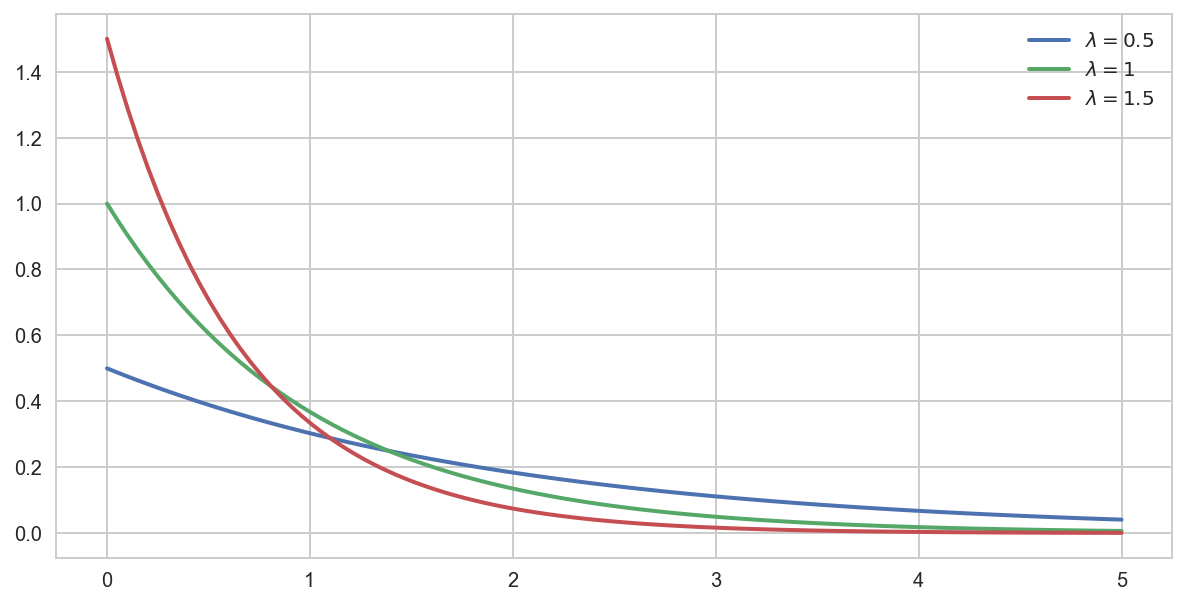

In [45]:
data = [0.5, 1, 1.5]
fig, ax = plt.subplots(figsize=(10,5))
for lamda in data:
    x = np.linspace(0, 5, 100)
    y = stats.expon(scale=1/lamda).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\lambda={lamda}$' for lamda in data])
plt.show()

### Normal distribution
[Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (also known as Gaussian distribution) is the most important distribution in Statistics since many continuous data in real life follow a normal distribution such as human weights, IQ scores, blood pressures and shoe sizes. It is also the foundation of many other distributions as well as the Centre Limit Theorem. The PDF of normal distribution is:

$$f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\cdot\exp{\left(-\frac{1}{2}{\frac{(x-\mu)^2}{\sigma^2}}\right)}$$

If $\mathbf{x}$ is a normal distributed random variable: $\mathbf{x}\sim \mathcal{N}(\mu,\sigma)$, then $\mathbf{x}$ has the mean of $\mu$ and the variance of $\sigma^2$. In the case $\mathbf{x}\sim \mathcal{N}(0,1)$, the variable is now standard normal distributed.

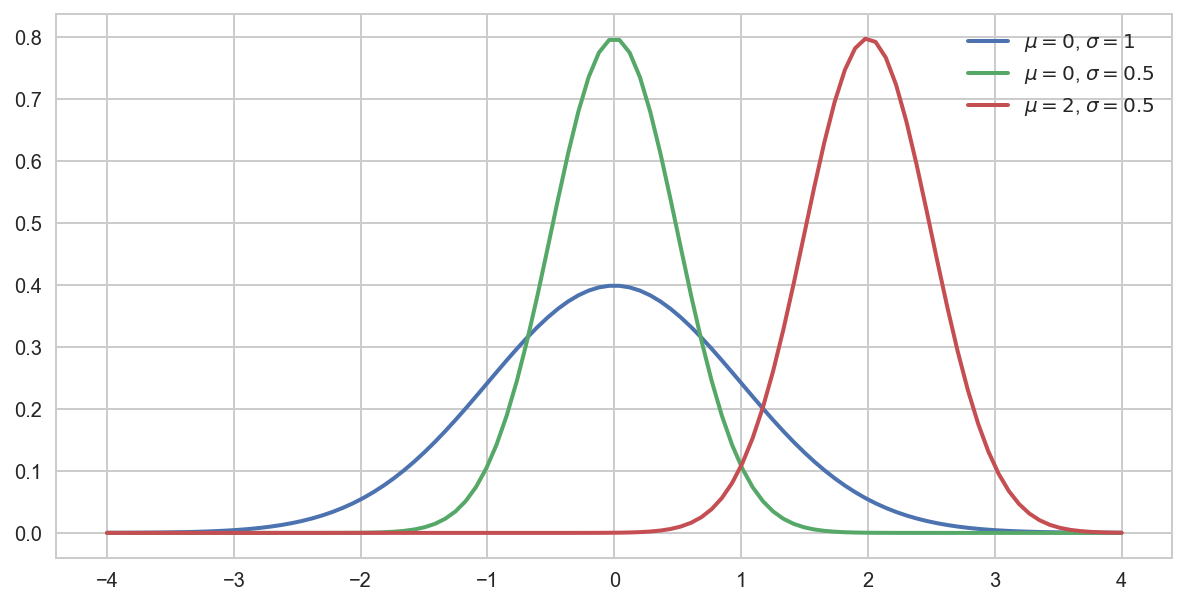

In [46]:
data = [(0, 1), (0, 0.5), (2, 0.5)]
fig, ax = plt.subplots(figsize=(10,5))
for mu, sigma in data:
    x = np.linspace(-4, 4, 100)
    y = stats.norm(mu, sigma).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\mu={mu}$, $\sigma={sigma}$' for mu, sigma in data])
plt.show()

### Logistic distribution
[Logistic distribution](https://en.wikipedia.org/wiki/Logistic_distribution) can be used in growth models and logistic regression; its shape is very similar to normal distribution. Logistic distribution has two parameters: $\mu$ (location) and $s$ (scales). Consecutively, the PDF of logistic distribution is:

$$f(x;\mu,s) = \frac{\exp{\left(-\frac{x-\mu}{s}\right)}}{s\left(1+\exp{\left(-\frac{x-\mu}{s}\right)}\right)^{2}}$$

If $\mathbf{x}$ is a logistic distributed random variable: $\mathbf{x}\sim \mbox{Logistic}(\mu,s)$, then $\mathbf{x}$ has the mean of $\mu$ and the variance of $\displaystyle{\frac{s^2 \pi^2}{3}}$.

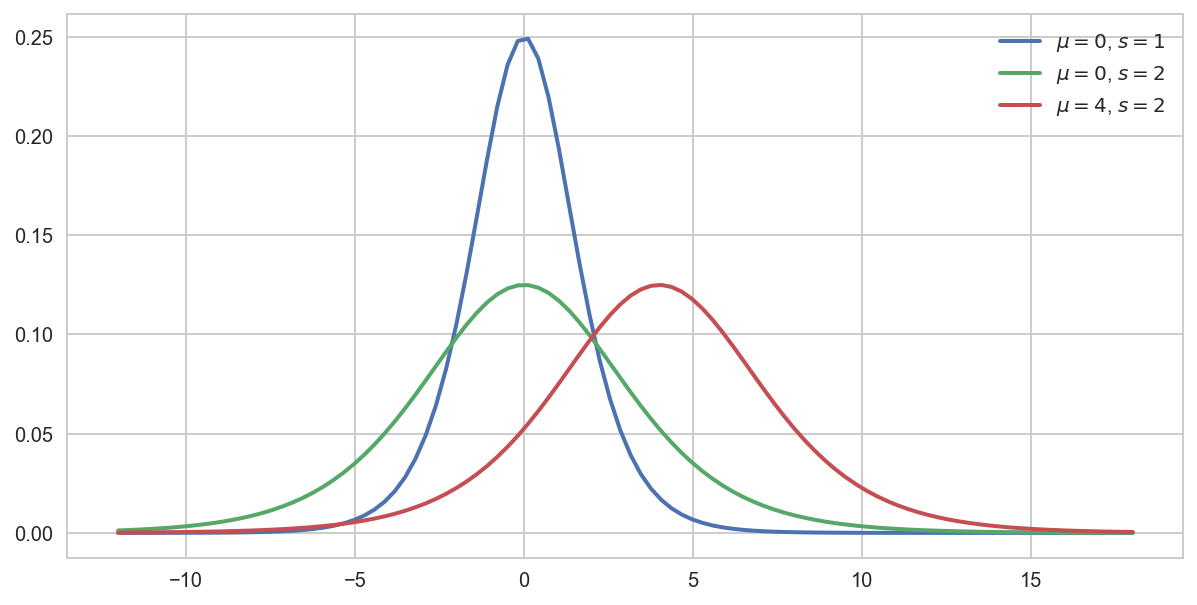

In [47]:
data = [(0, 1), (0, 2), (4, 2)]
fig, ax = plt.subplots(figsize=(10,5))
for mu, s in data:
    x = np.linspace(-12, 18, 100)
    y = stats.logistic(mu, s).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\mu={mu}$, $s={s}$' for mu, s in data])
plt.show()

### t-distribution
Let $\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_D$ be independent samples drawn from the distribution $\mathcal{N}(\mu,\sigma)$, then the random variable $\dfrac{\hat \mu_{d}-\mu}{\hat \sigma_{d}/\sqrt{n}}$ has a [t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) with $\nu=D-1$ degree of freedom. When sample size is large $D>30$, the difference between t-distribution and normal distribution is negligible, therefore it can be used as a normal approximation when population variance is unknown. The PDF of t-distrbution is:

$$
f(x;\nu) = 
\frac {\Gamma\left(\frac{\nu+1}{2}\right)} {\Gamma\left(\frac{\nu}{2}\right)\sqrt{\nu\pi}}
{\left(1+\frac{x^2}{\nu}\right)}^{-\frac{\nu+1}{2}}
$$

Notice that $\Gamma(x)$ is the gamma function, which is the extension of factorial function to real numbers.

If $\mathbf{x}$ is a t-distributed random variable: $\mathbf{x}\sim \mbox{t}(\nu)$, then $\mathbf{x}$ has the mean of $0$ and the variance of $\nu/(\nu-2)$.

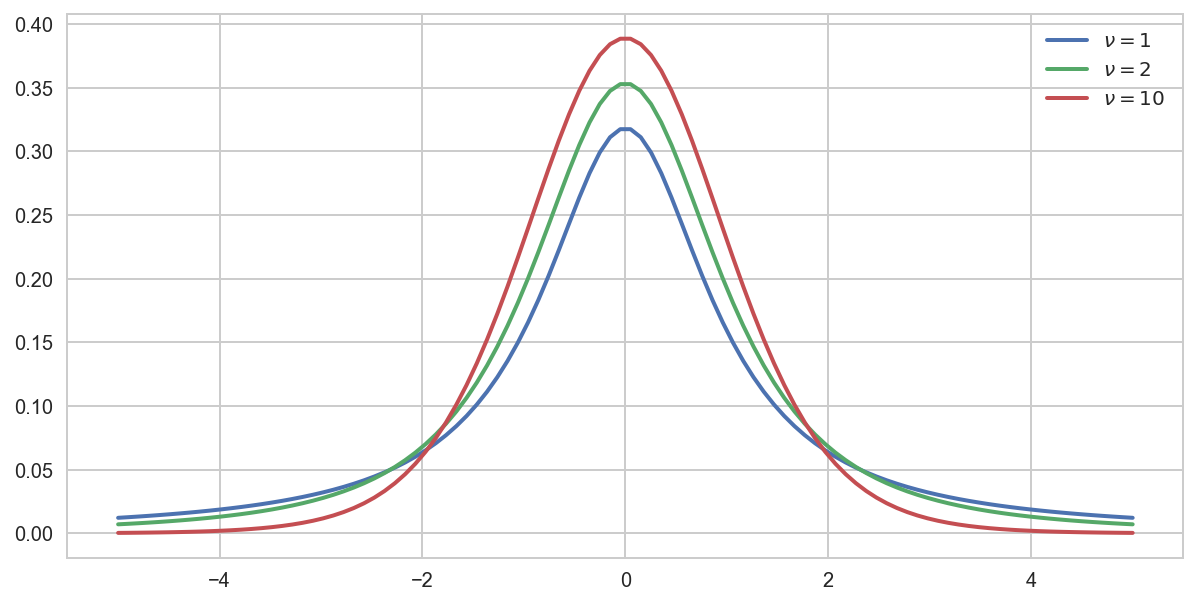

In [48]:
data = [1, 2, 10]
fig, ax = plt.subplots(figsize=(10,5))
for nu in data:
    x = np.linspace(-5, 5, 100)
    y = stats.t(nu).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\nu={nu}$' for nu in data])
plt.show()

### Chi-square distribution
Let $\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_D$ are independent standard normal distributed variables, then the sum of their squares has a [chi-square distribution](https://en.wikipedia.org/wiki/Chi-square_distribution) with $D$ degrees of freedom. Chi-square distribution is mainly used in hypothesis testing. The PDF of chi-square distribution is:

$$f(x;k) = \frac {1}{\Gamma \left(\frac{k}{2}\right)2^{\frac{k}{2}}}\cdot x^{\frac{k}{2}-1}\cdot e^{-\frac{x}{2}}$$

If $\mathbf{x}$ is a chi-square distributed random variable: $\mathbf{x}\sim \chi^2(\nu)$, then $\mathbf{x}$ has the mean of $k$ and the variance of $2k$.

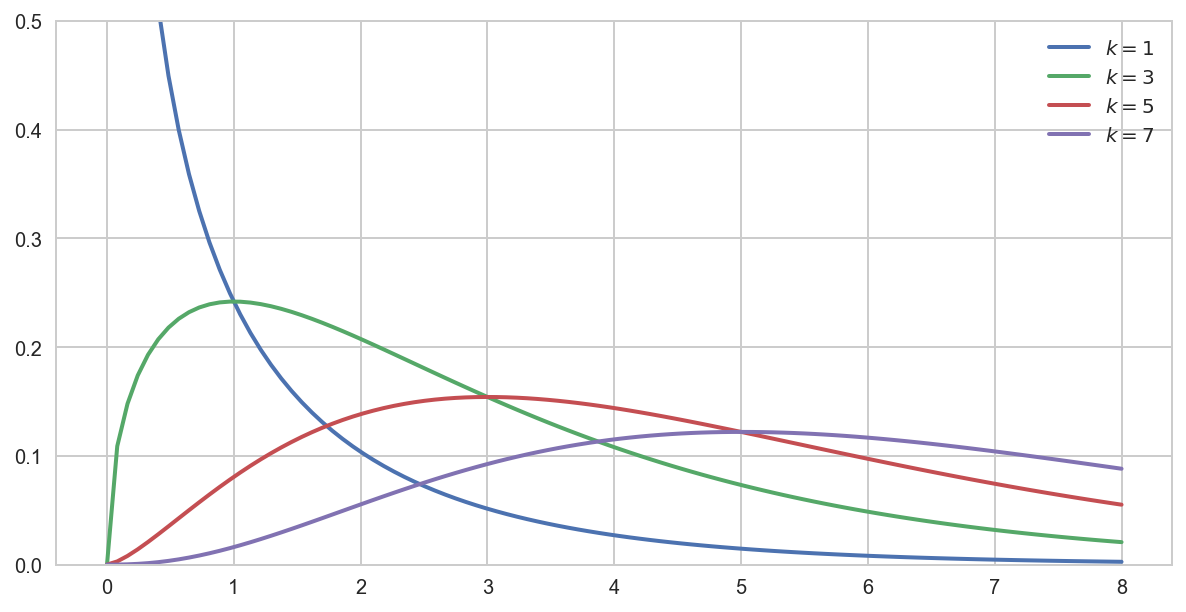

In [49]:
data = [1, 3, 5, 7]
fig, ax = plt.subplots(figsize=(10,5))
for k in data:
    x = np.linspace(0, 8, 100)
    y = stats.chi2(k).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$k={k}$' for k in data])
ax.set_ylim((0, 0.5))
plt.show()

### F-distribution
Given two variable $\mathbf{x}_1\sim \chi^2(d_1)$ and $\mathbf{x}_2\sim \chi^2(d_2)$, then the variable $\dfrac{\mathbf{x}_1/d_1}{\mathbf{x}_2/d_2}$ has a [F-distribution](https://en.wikipedia.org/wiki/F-distribution) with two shape parameters $d_1$, $d_2$ (degrees of freedom). The PDF of F-distribution is:

$$f(x; d_1, d_2) = 
\frac{1}{x\,\mbox{B}\left(\frac{d_1}{2},\frac{d_2}{2}\right)}
\sqrt{\frac{(d_1x)^{d_1}\,d_2^{d_2}}{(d_1x+d_2)^{d_1+d_2}}}$$

If $\mathbf{x}$ is a F-distributed random variable: $\mathbf{x}\sim \mbox{F}(d_1,d_2)$, then $\mathbf{x}$ has the mean of $\dfrac{d_2}{d_2-2}$ and the variance of $\dfrac{2d_2^2\,(d_1+d_2-2)}{d_1(d_2-2)^2(d_2-4)}$.

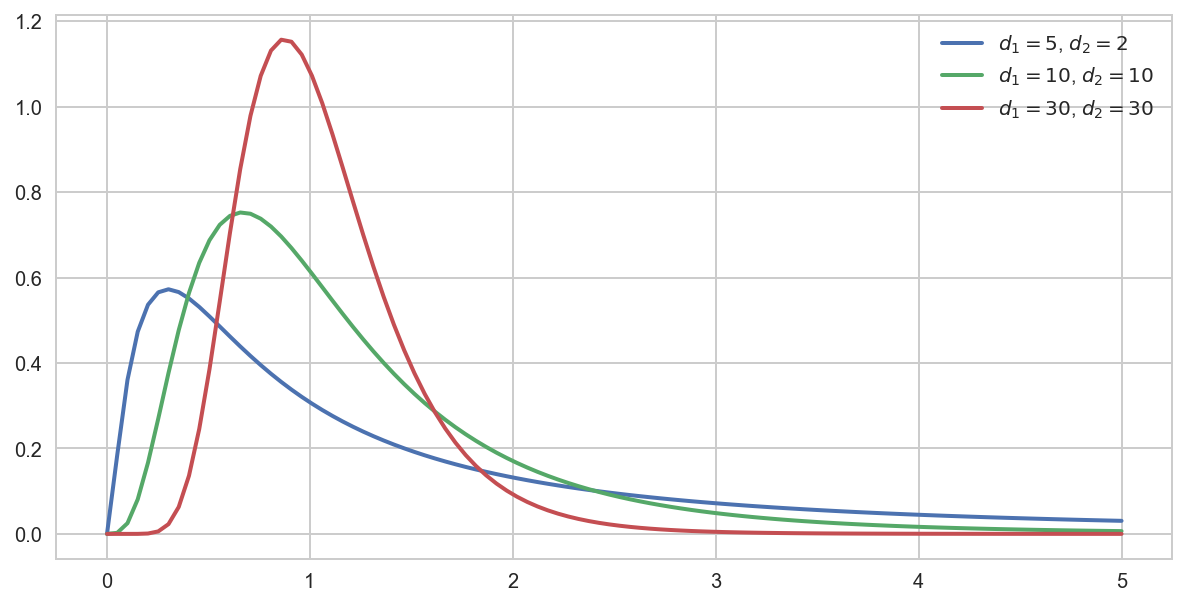

In [50]:
data = [(5,2), (10,10), (30,30)]
fig, ax = plt.subplots(figsize=(10,5))
for d1, d2 in data:
    x = np.linspace(0, 5, 100)
    y = stats.f(d1, d2).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$d_1={d1}$, $d_2={d2}$' for d1, d2 in data])
plt.show()

### Beta distribution
[Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is defined in the interval $[0;1]$ with two shape parameters, $\alpha$ and $\beta$. The PDF of beta distribution is:

$$f(x;\alpha,\beta) = \frac{x^{\alpha-1}\,(1-x)^{\beta-1}}{\mbox{B}(\alpha,\beta)}$$

Notice that $\mbox{B}(\alpha,\beta)$ is the beta function which is defined based on the gamma function. The denominator in this function works as a normalization to ensure the area under the curve is 1.

If $\mathbf{x}$ is a beta distributed random variable: $\mathbf{x}\sim \mbox{Beta}(\alpha,\beta)$, then $\mathbf{x}$ has the mean of $\displaystyle{\frac{\alpha}{\alpha+\beta}}$ and the variance of $\displaystyle{\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}}$.

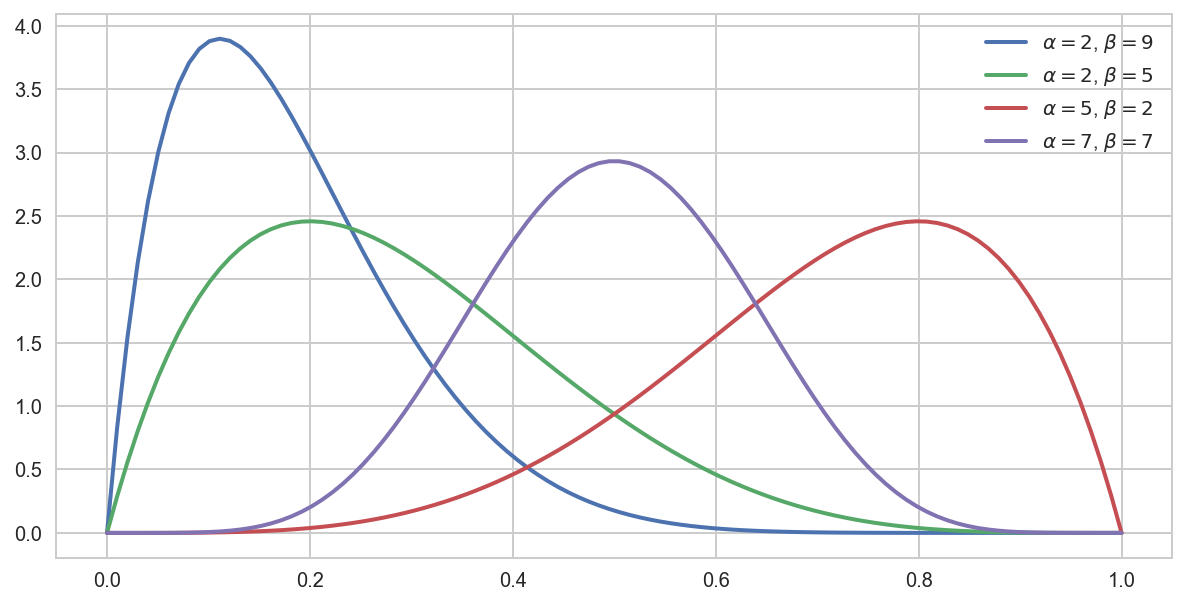

In [51]:
data = [(2,9), (2,5), (5,2), (7,7)]
fig, ax = plt.subplots(figsize=(10,5))
for a, b in data:
    x = np.linspace(0, 1, 100)
    y = stats.beta(a, b).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$\alpha={a}$, $\beta={b}$' for a, b in data])
plt.show()

### Gamma distribution
[Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution) has the exponential distribution and the chi-square distribution as special cases. It has a shape parameter $k$ and a scale parameter $\theta$. The PDF of gamma distribution is:

$$f(x;k,\theta) = 
\frac{x^{k-1}e^{-\frac{x}{\theta}}}{\Gamma(k)\,\theta^k}$$

If $\mathbf{x}$ is a gamma distributed random variable: $\mathbf{x}\sim \Gamma(k,\theta)$, then $\mathbf{x}$ has the mean of $k\theta$ and the variance of $k\theta^2$.

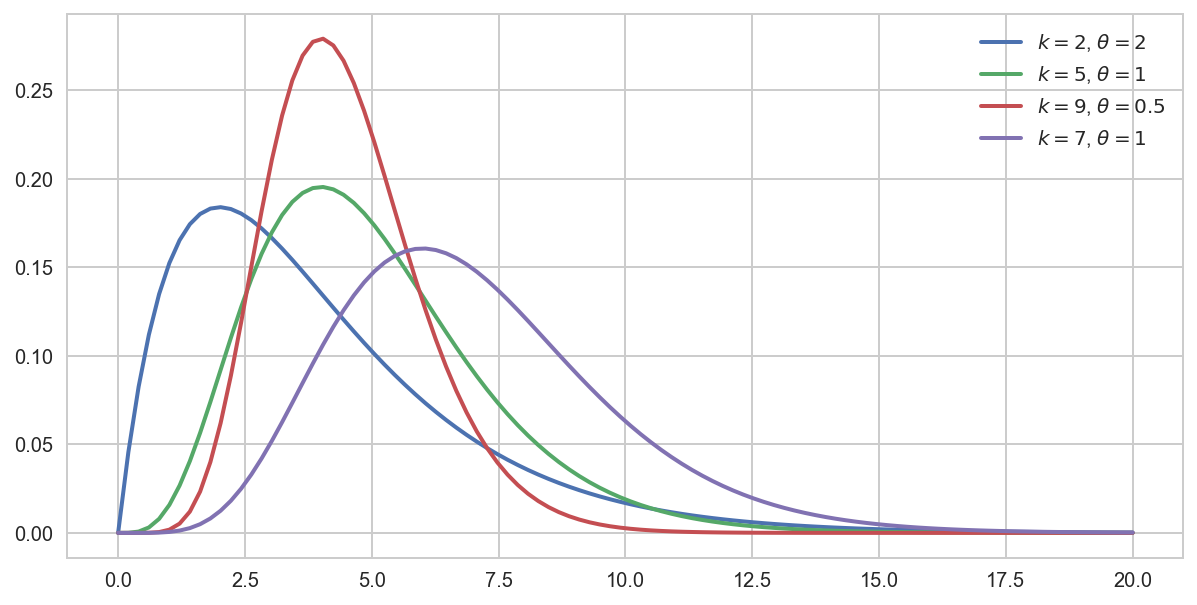

In [52]:
data = [(2,2), (5,1), (9,0.5), (7,1)]
fig, ax = plt.subplots(figsize=(10,5))
for k, theta in data:
    x = np.linspace(0, 20, 100)
    y = stats.gamma(a=k, scale=theta).pdf(x)
    ax.plot(x, y, linewidth=2)
ax.legend([fr'$k={k}$, $\theta={theta}$' for k, theta in data])
plt.show()

## 2.3. Multivariate distribution 

In [53]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Gaussian distribution
[Multivariate Gaussian distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) is the generalization of univariate Gaussian distribution into high dimensional space. $D$ variables $\mathbf{X}=\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_D$ following a normal distribution is denoted $\mathbf{X}\sim\mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})$. Here:
- $\boldsymbol{\mu}\in\mathbb{R}^D$ is the mean vector, the element $\mu_d$ is the mean of the respective variable $\mathbf{x}_d$
- $\boldsymbol{\Sigma}\in\mathbb{R}^{D\times D}$ is the covariance matrix, where the elements in the diagonal show the variances and elements elsewhere show the pair-wise covariance.

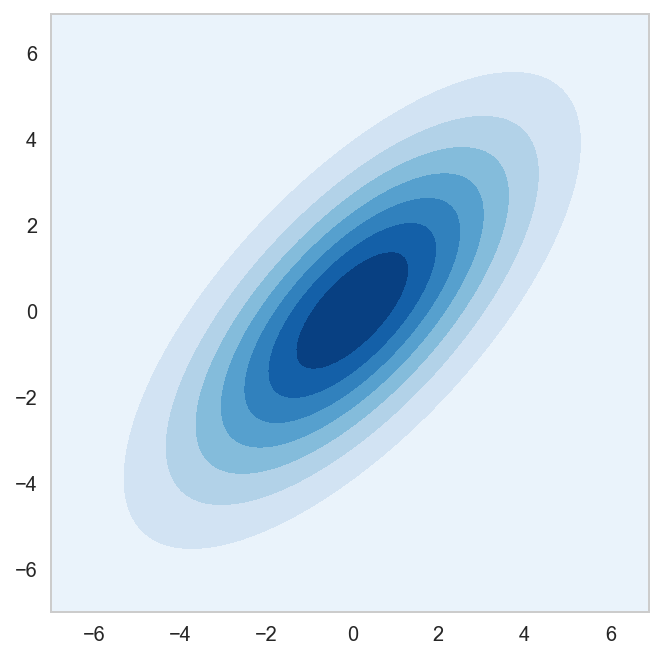

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

mu = [0, 0]
sigma = np.array([
    [6.8, 5.0],
    [5.0, 7.4]
])
dist = stats.multivariate_normal(mu, sigma)
x, y = np.mgrid[-7:7:.1, -7:7:.1]
data = np.dstack([x, y])
z = dist.pdf(data)

fig, ax = plt.subplots()
ax.contourf(x, y, z, cmap='Blues')
ax.axis('scaled')
plt.show()

# 3. Limit theorems
When some conditions are met, a random variable follows some specific rules. Limit theorems appear to help us find out those rules and apply it in economics and business.

## 3.1. Bernoulli theorem

If $f$ is frequency of A in $n$ independent trials and $p$ is probability of A in each trial, then with all $\epsilon > 0$ we have:

$$\lim_{n \rightarrow \infty} P(|f-p| < \epsilon) =1$$

The formula says that the relative frequency of success in a sequence of Bernoulli trials approaches the probability of success as the number of trials increases towards infinity. It is proved that the stability of frequency is around probability of an event. Bernoulli theorem is also called the law of large numbers of Bernoulli.

## 3.2. Central limit theorem
In probability theory, the Central Limit Theorem (CLT) establishes that, with large amount of random variables, CLT that even if the data distribution is not normal, the distribution of the means of the samples drawn from it will be normal.

Below are the practical implications of knowing that means are normally distributed:
- Use the mean’s normal distribution to assign confidence intervals.
- Perform any statistical test under the sun which uses sample mean.

In [55]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [56]:
means = []
samples = []
for i in range(0, 1000):
    samples.append(np.random.exponential(scale=1.0, size=20))
    means.append(np.mean(samples[i]))

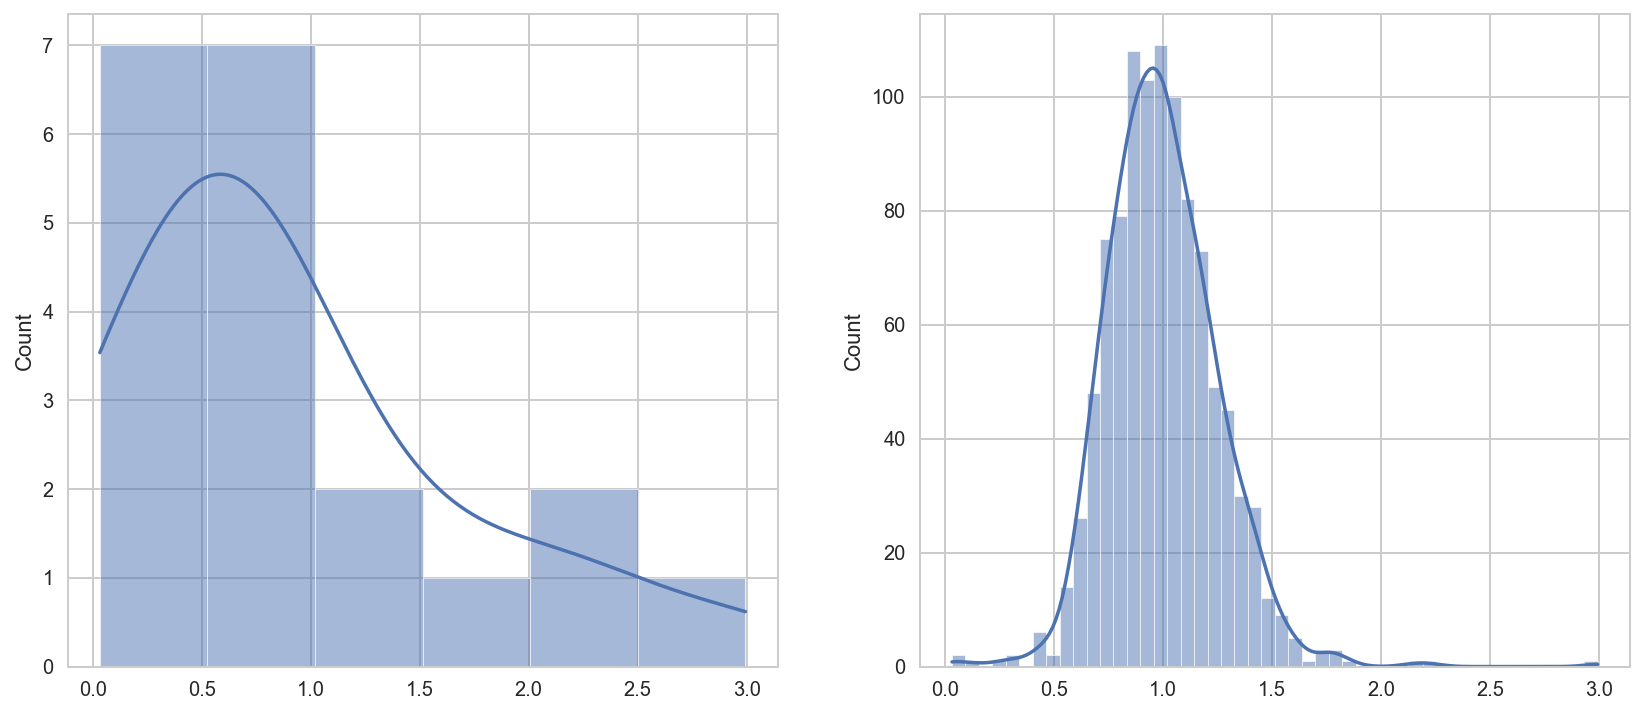

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(samples[0], ax=ax[0], kde=True, edgecolor='w')
sns.histplot(np.append(samples[0], means), ax=ax[1], kde=True, edgecolor='w')
plt.show()

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*